# Deep Neural Network for MNIST Classification

### Import the relevant packages

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time as t
import tensorflow as tf
import tensorflow_datasets as tfds

### Data is loaded and preprocessed. 

In [127]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples

num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples

num_test_samples = tf.cast(num_test_samples, tf.int64)

def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.

    return image, label

scaled_train_and_validation_data = mnist_train.map(scale)

test_data = mnist_test.map(scale)

BUFFER_SIZE = 10000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)

train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)

validation_data = validation_data.batch(num_validation_samples)

test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

### Function to create neural net structure and run model

In [128]:
def make_and_train_NN(HL_size, HL_number, HL_act_function, num_epochs):
    '''
    Create and train the neural network with inputs for the hidden layer size, 
    number of hidden layers, hidden layer activation function and number of epochs
    '''
    
    input_size = 784
    output_size = 10
    
    input_layer = tf.keras.layers.Flatten(input_shape=(28, 28, 1))
    hidden_layers = [None for _ in range(HL_number)]
    output_layer = tf.keras.layers.Dense(output_size, activation='softmax')

    for i, n in enumerate(hidden_layers):
        hidden_layer = tf.keras.layers.Dense(HL_size, activation=HL_act_function)
        hidden_layers[i] = hidden_layer
    
    model = tf.keras.Sequential([input_layer] + hidden_layers + [output_layer])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    results = model.fit(train_data, epochs=num_epochs, validation_data=(validation_inputs, validation_targets), verbose =0)
    val_accuracy = results.history['val_accuracy']
    
    return val_accuracy

In [129]:
test = make_and_train_NN(5, 1, 'relu', 10)

In [130]:
test[-1]

0.8811666369438171

### Function to run multiple layers

In [131]:
def train_many_NNs(HL_size_min, 
                   HL_size_max, 
                   size_step, 
                   HL_no_min, 
                   HL_no_max,
                   no_step,
                   HL_act_function,
                   num_epochs,
                   last_epoch_only):
    
    '''
    Loop through ranges of hidden layer size and numbers
    last_epoch_only - 'yes' if you want to out put value for last epoch
    '''
    
    accuracies = []
    HL_sizes = list(range(HL_size_min, HL_size_max + size_step, size_step))
    HL_numbers = list(range(HL_no_min, HL_no_max + no_step, no_step))
    
    start_train_time = t.time()
    
    for HL_size in HL_sizes:
        
        accuracies_nest = []
        
        for HL_number in HL_numbers:
            
            start_loop_time = t.time()
            
            accuracy = make_and_train_NN(HL_size, HL_number, HL_act_function, num_epochs)
            
            if last_epoch_only == 'no':
                accuracies_nest.append(accuracy)
            elif last_epoch_only == 'yes':
                accuracies_nest.append(accuracy[-1])
            
            time_loop = round(t.time() - start_loop_time,2)
            
            print(f"Trained neural net with {HL_number} hidden layers with {HL_size} nodes in {time_loop} seconds.")
        
        accuracies.append(accuracies_nest)
    
    total_train_time = round((t.time() - start_train_time)/60,1)
    
    print(f"Total time taken: {total_train_time} minutes.")
    
    return accuracies, HL_sizes, HL_numbers

# Set hidden layer size and number hyperparameters here

In [132]:
NUM_EPOCHS = 15
start = t.time()
accuracies, HL_sizes, HL_numbers = train_many_NNs(HL_size_min = 10, 
                                                  HL_size_max = 100, 
                                                  size_step = 10, 
                                                  HL_no_min = 1, 
                                                  HL_no_max = 10, 
                                                  no_step = 1, 
                                                  HL_act_function = 'relu', 
                                                  num_epochs = NUM_EPOCHS,
                                                  last_epoch_only = 'yes')
total_time = round((t.time() - start)/60,1)

Trained neural net with 1 hidden layers with 10 nodes in 55.06 seconds.
Trained neural net with 2 hidden layers with 10 nodes in 55.2 seconds.
Trained neural net with 3 hidden layers with 10 nodes in 58.84 seconds.
Trained neural net with 4 hidden layers with 10 nodes in 60.34 seconds.
Trained neural net with 5 hidden layers with 10 nodes in 59.35 seconds.
Trained neural net with 6 hidden layers with 10 nodes in 56.77 seconds.
Trained neural net with 7 hidden layers with 10 nodes in 58.11 seconds.
Trained neural net with 8 hidden layers with 10 nodes in 58.41 seconds.
Trained neural net with 9 hidden layers with 10 nodes in 61.89 seconds.
Trained neural net with 10 hidden layers with 10 nodes in 62.68 seconds.
Trained neural net with 1 hidden layers with 20 nodes in 63.02 seconds.
Trained neural net with 2 hidden layers with 20 nodes in 61.77 seconds.
Trained neural net with 3 hidden layers with 20 nodes in 61.06 seconds.
Trained neural net with 4 hidden layers with 20 nodes in 61.94 s

In [133]:
# This is used to check the model accuracy with respect to the test data
# test_loss, test_accuracy = model.evaluate(test_data)

In [135]:
np.array(accuracies), HL_sizes, HL_numbers

(array([[0.93150002, 0.93966669, 0.92966664, 0.93833333, 0.93816668,
         0.91566664, 0.92000002, 0.92549998, 0.89883333, 0.9145    ],
        [0.96316665, 0.9691667 , 0.96216667, 0.96433336, 0.96700001,
         0.96100003, 0.95616668, 0.95966667, 0.95999998, 0.96066666],
        [0.97083336, 0.97416669, 0.97616667, 0.97633332, 0.97466666,
         0.97666669, 0.97399998, 0.97549999, 0.97333336, 0.96633333],
        [0.97883332, 0.98416668, 0.98233336, 0.98066664, 0.97383332,
         0.97433335, 0.97733331, 0.98116666, 0.97250003, 0.97600001],
        [0.9795    , 0.98699999, 0.98799998, 0.98016667, 0.98699999,
         0.98000002, 0.98183334, 0.98066664, 0.98283333, 0.97883332],
        [0.98183334, 0.98633331, 0.98883331, 0.98733336, 0.98683333,
         0.98283333, 0.98216665, 0.98400003, 0.98083335, 0.97966665],
        [0.98783332, 0.991     , 0.98816669, 0.98833334, 0.9885    ,
         0.97966665, 0.98783332, 0.98900002, 0.97899997, 0.98150003],
        [0.9885    , 0.9890

### Plot validation accuracy vs epochs for different neural net dimensions (hyperparameters)

In [136]:
import seaborn as sns

In [137]:
x_axis_labels = np.array(HL_numbers)
y_axis_labels = np.array(HL_sizes)
z = np.array(accuracies)

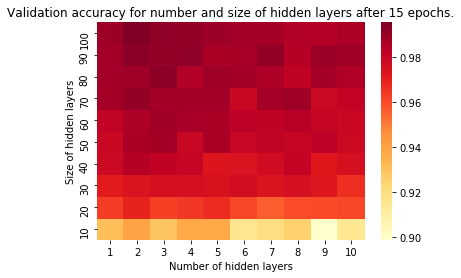

In [142]:
ax = sns.heatmap(z,xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap="YlOrRd")
ax.invert_yaxis()
plt.title(f"Validation accuracy for number and size of hidden layers after {NUM_EPOCHS} epochs.")
plt.xlabel('Number of hidden layers')
plt.ylabel('Size of hidden layers')
plt.savefig('NN_hyperparameters_2.png')
plt.show()

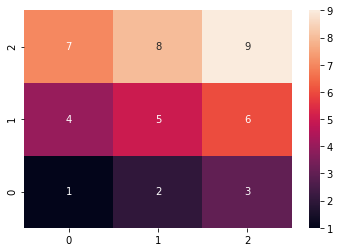

In [146]:
ztest = np.array([[1,2,3], [4,5,6], [7,8,9]])
ax = sns.heatmap(ztest, annot = True)
ax.invert_yaxis()